In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import os
from tqdm import tqdm_notebook as tqdm
%config InlineBackend.figure_format = 'retina'
import numpy as np

In [2]:
def get_lemma_distribution(file_name):
    lemmas=[]
    for line in open(file_name):
        url=line.strip().split(' ')[2]
        lemma=url[url.rfind('/')+1:]
        lemmas.append(lemma)
    return lemmas

In [3]:
def get_time_distribution(file_name):
    times=[]
    for line in open(file_name):
        t=float(line.strip().split(' ')[1])
        t=datetime.fromtimestamp(t)
        times.append(t)
    return times    

In [4]:
times=[]
f=open('./data/list1.txt')
f.readline()
f=f.readlines()
for line in tqdm(f):
    line=line.strip()
    line=line[:-3]
    if os.path.exists('./data/only_lemma/%s'%line):
        times+=get_time_distribution('./data/only_lemma/%s'%line)

In [5]:
def show_time_curve(time_serial, xlabel, ylabel, title):
    count=list(Counter(time_serial).items())
    count=sorted(count, key=lambda x:x[0])
    x,y=[],[]
    for xx,yy in count:
        x.append(xx)
        y.append(yy)
    plt.figure(figsize=(10,7))
    plt.plot(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()

In [6]:
start_time=datetime.strptime('2007-09-01 00:00:00', "%Y-%m-%d %H:%M:%S")

In [7]:
passed_second=[(t-start_time).total_seconds() for t in times]

In [9]:
passed_hour=np.array(passed_second)//3600

In [10]:
passed_day=passed_hour//24

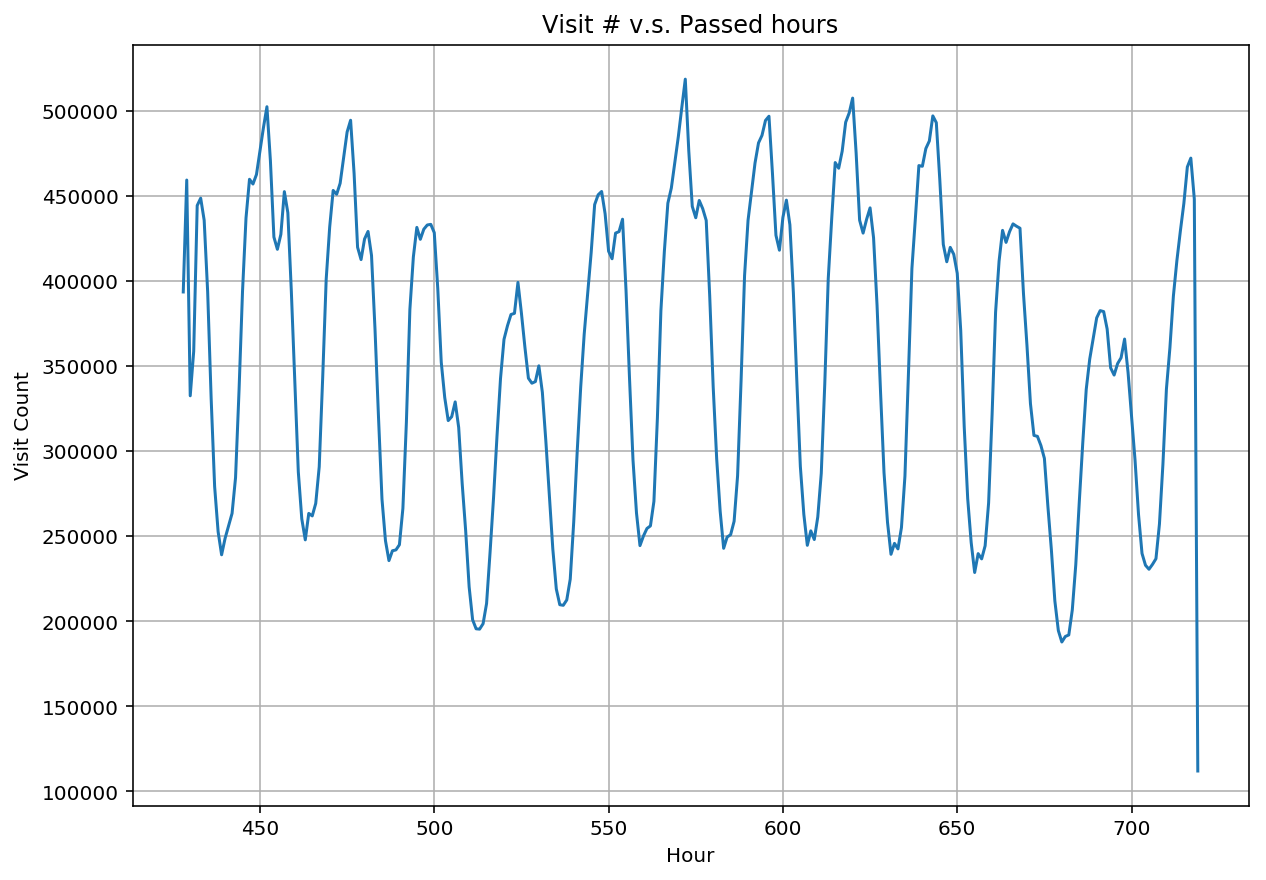

In [12]:
show_time_curve(passed_hour, 'Hour', 'Visit Count', 'Visit # v.s. Passed hours')

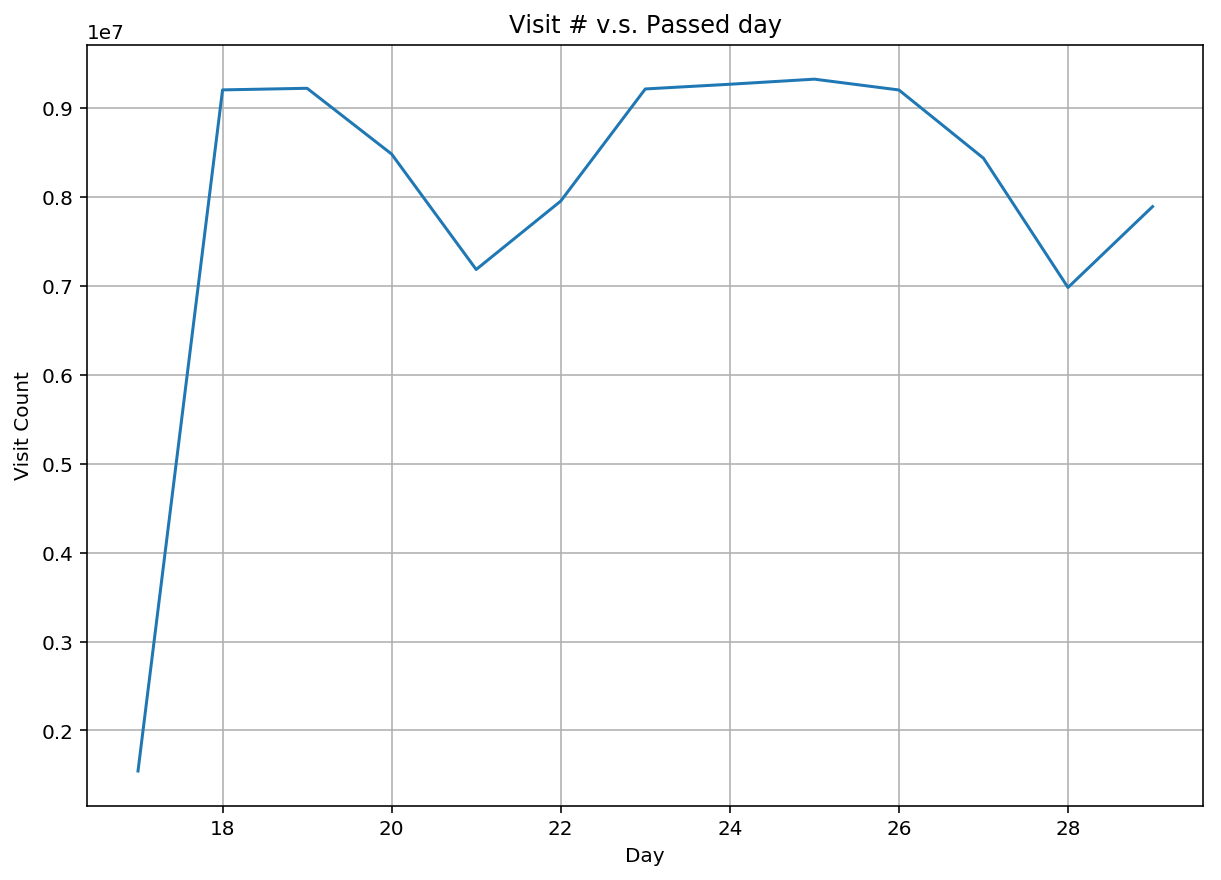

In [13]:
show_time_curve(passed_day, 'Day', 'Visit Count', 'Visit # v.s. Passed day')

In [14]:
filtered_passed_hour=list(filter(lambda x:x//24>=18 and x//24<=28,passed_hour))

In [16]:
filtered_passed_hour=np.array(filtered_passed_hour)

In [17]:
filtered_passed_day=filtered_passed_hour//24

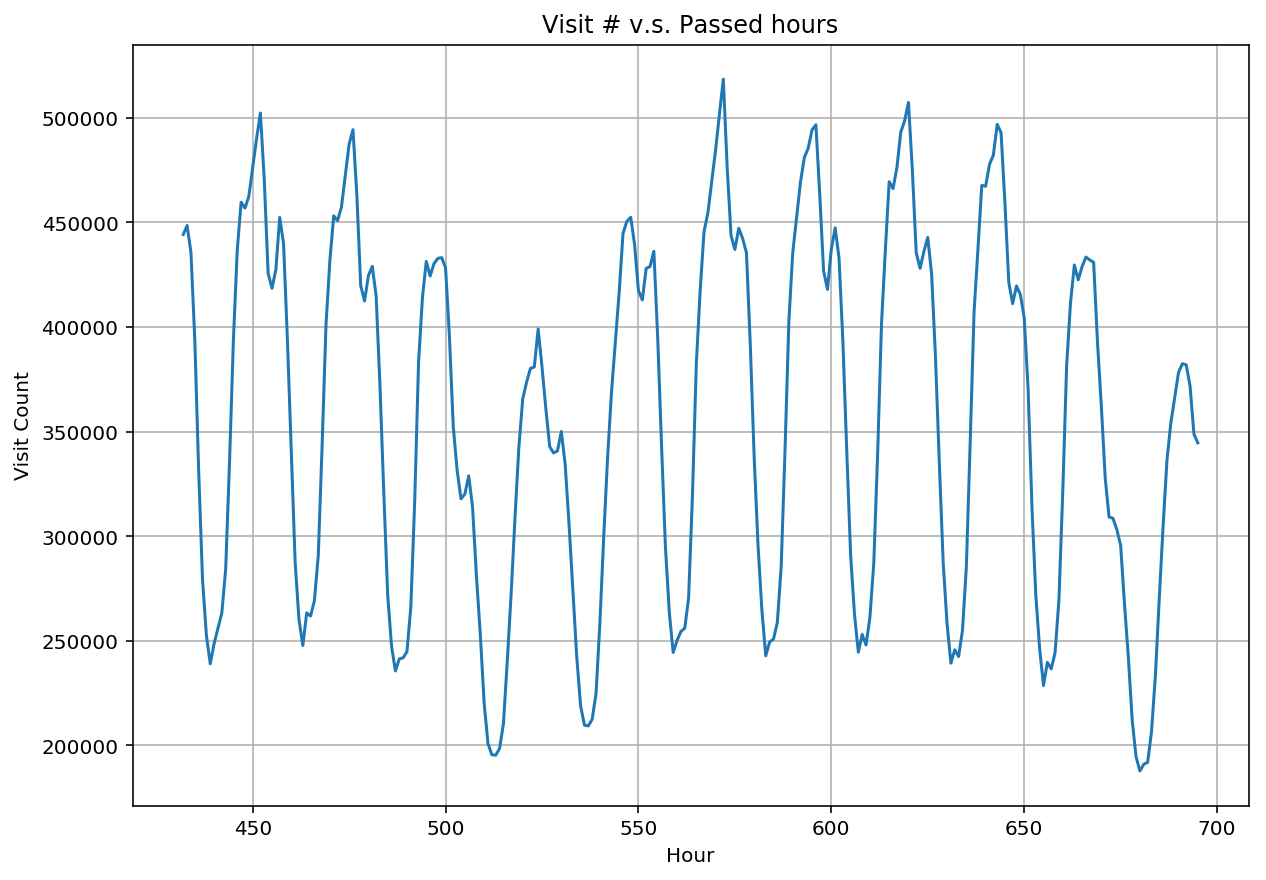

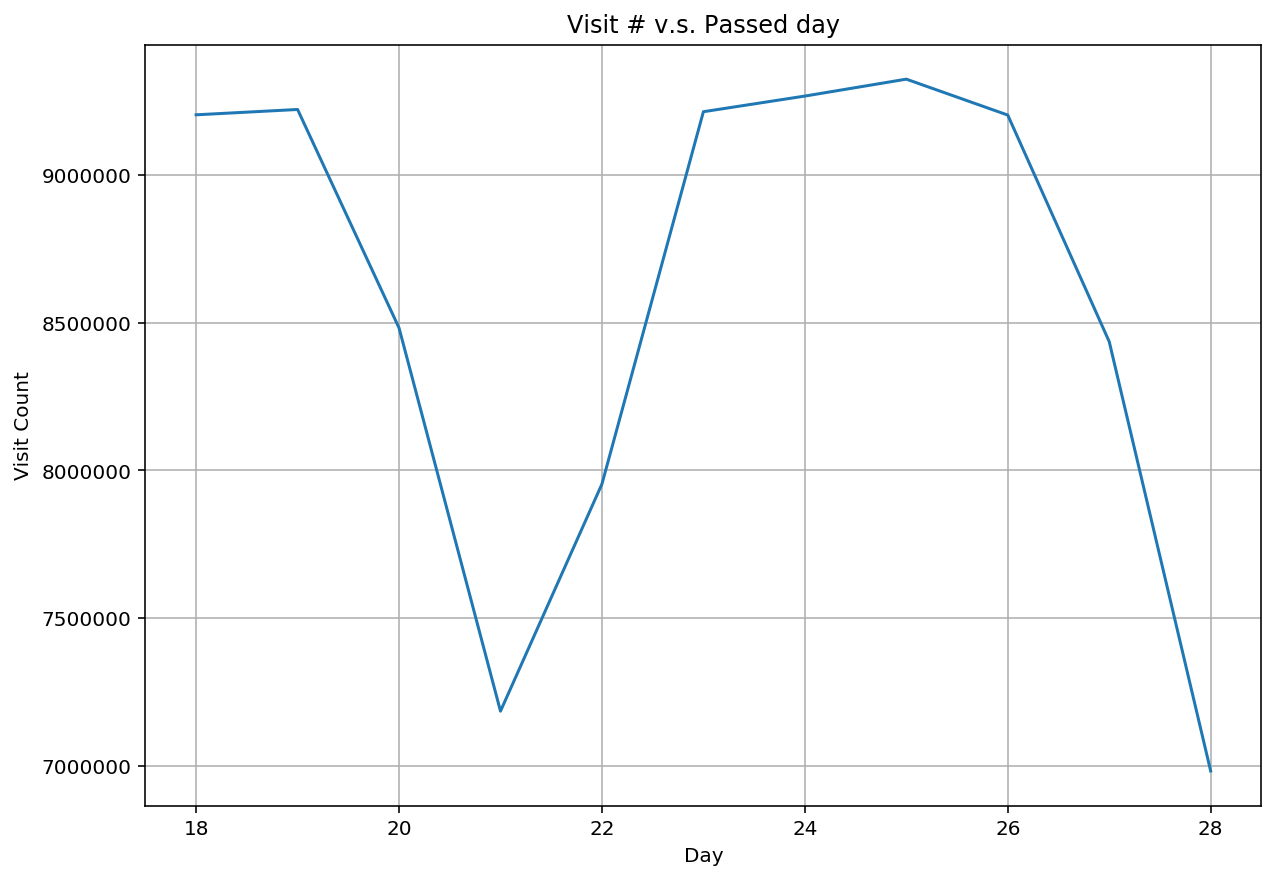

In [18]:
show_time_curve(filtered_passed_hour, 'Hour', 'Visit Count', 'Visit # v.s. Passed hours')
show_time_curve(filtered_passed_day, 'Day', 'Visit Count', 'Visit # v.s. Passed day')

In [30]:
visit_per_hour_one_day=filtered_passed_hour%24

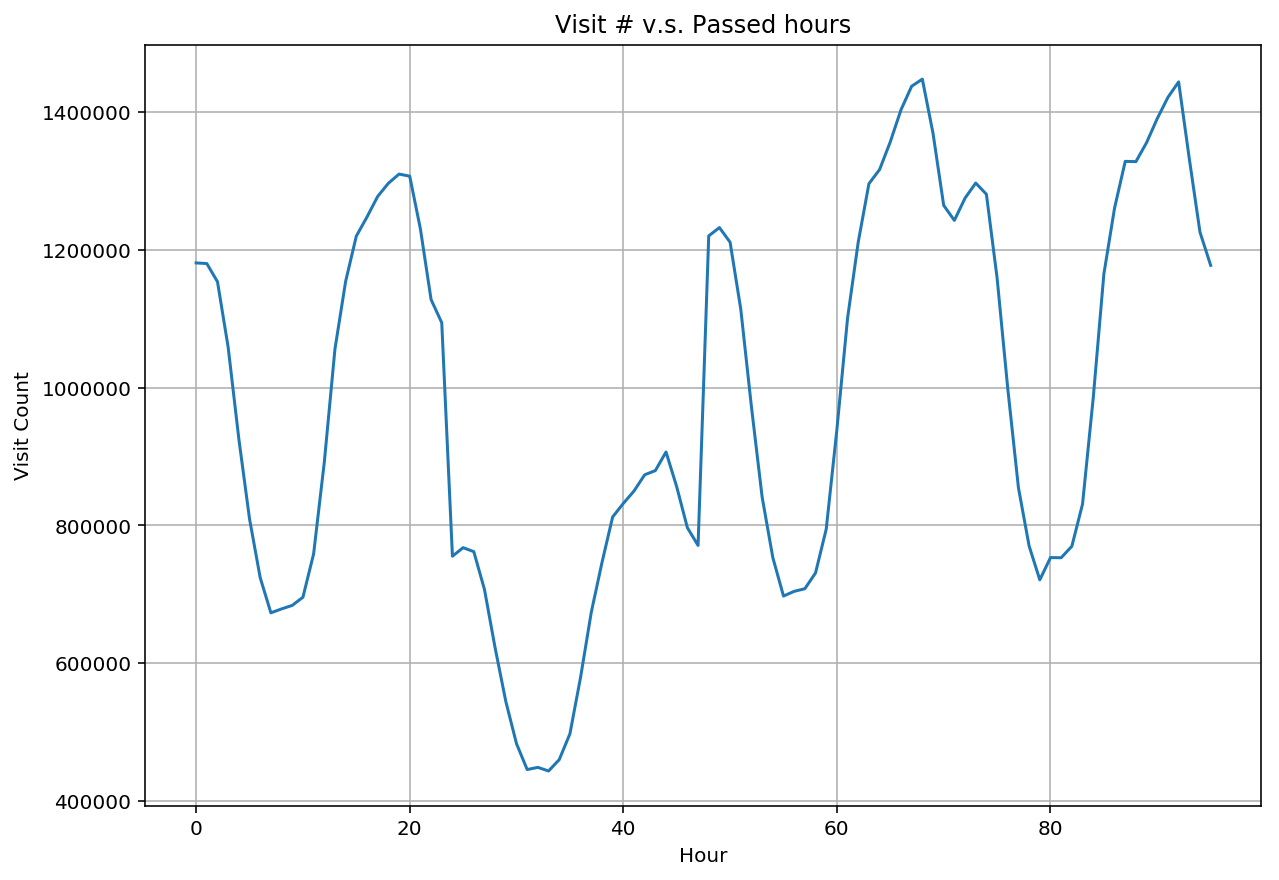

In [31]:
show_time_curve(visit_per_hour_one_day, 'Hour', 'Visit Count', 'Visit # v.s. Passed hours')